# K-means and K-medoids

alunos: *Gabriel Ferreira, Giovanny Lira, Dayane Lira*

# introdução

Aplicaremos os método de K-means e K-medoids para classificar universidades como públicas ou privadas.

# Bibliotecas e Dataframe

primeiramente importamos as bibliotecas usadas

In [498]:
!pip install scikit-learn-extra

import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.metrics import pairwise_distances
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

E carregamos nossa base de dados

In [499]:
df = pd.read_csv('https://raw.githubusercontent.com/gabriel-ferreira-da-silva/K-mean/main/dados/College.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [500]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


precimos converter o paramêtro Private de object para inteiro.

In [501]:
Private = []
for p in df['Private']:
  if p == 'Yes':
    Private.append(1)
  else:
    Private.append(0)

In [502]:
p = pd.DataFrame(Private, columns=['Private'])
df = df.drop('Private', axis = 1)
df = df.drop('Unnamed: 0', axis = 1)
df['Private'] = Private
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000,777.000000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332,0.727156
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771,0.445708
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000,0.000000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000,0.000000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000,1.000000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000,1.000000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000,1.000000


# Análise dos Dados


abaixo está o mapa de correlação dos dados

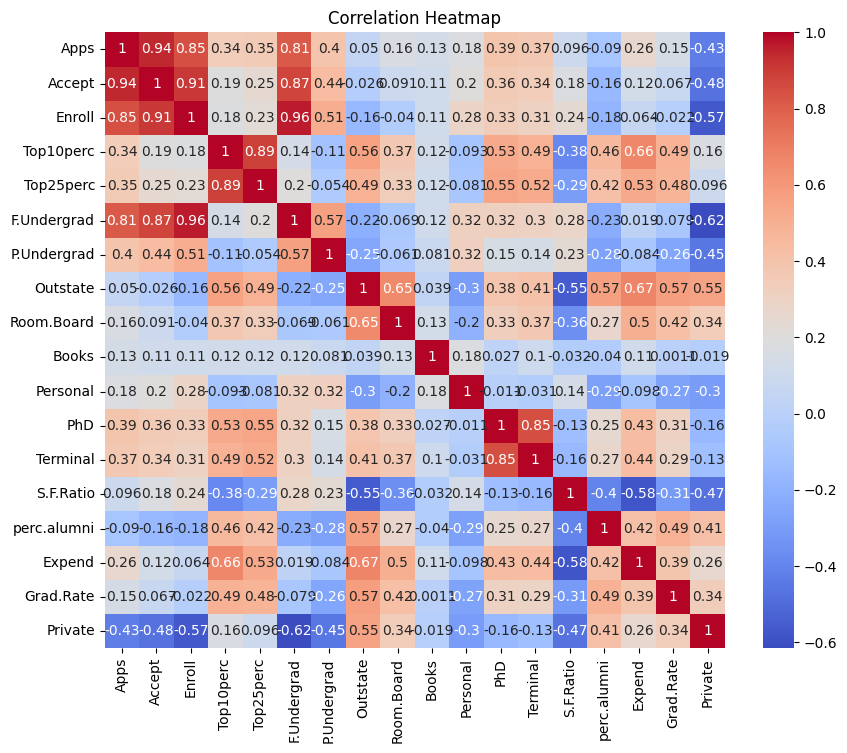

In [503]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Set the figure size (optional)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

tambem analisaremos box-plots

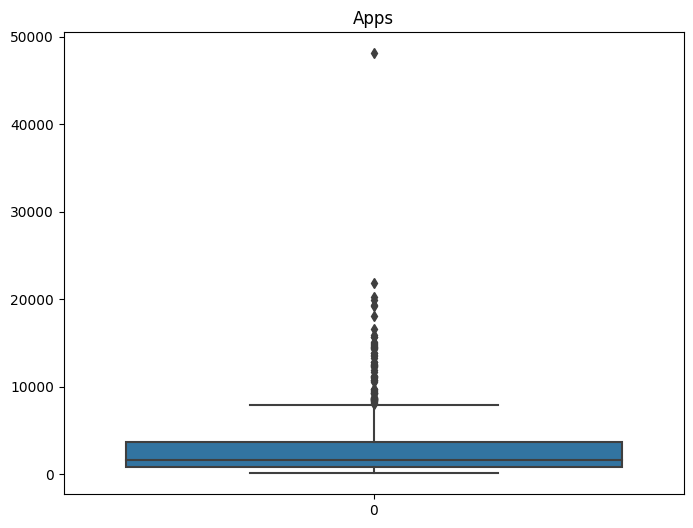

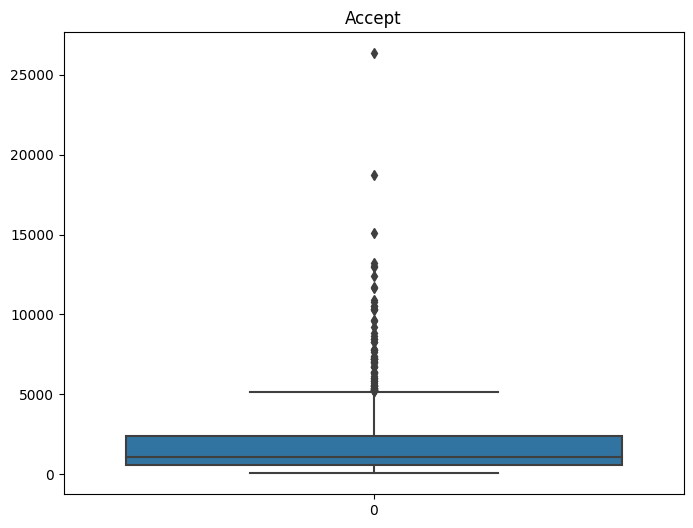

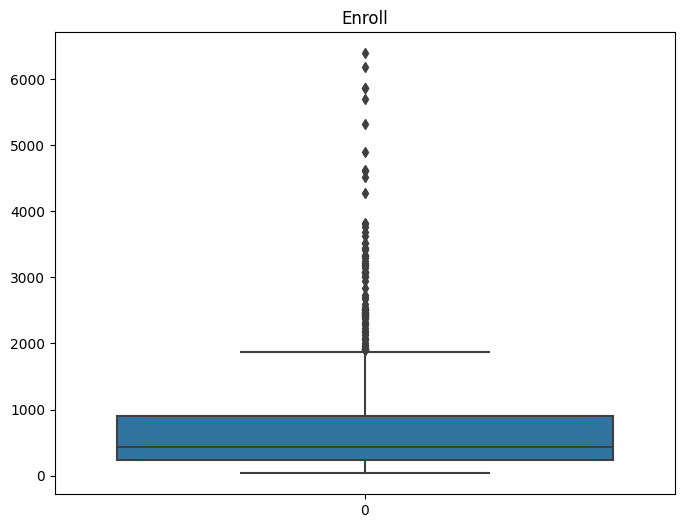

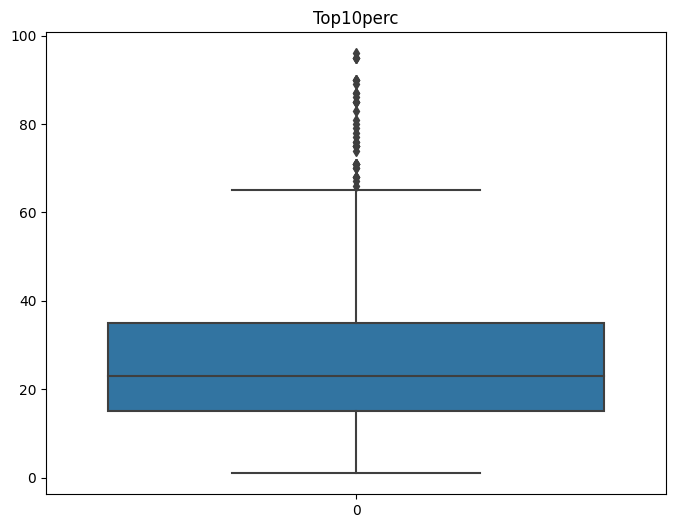

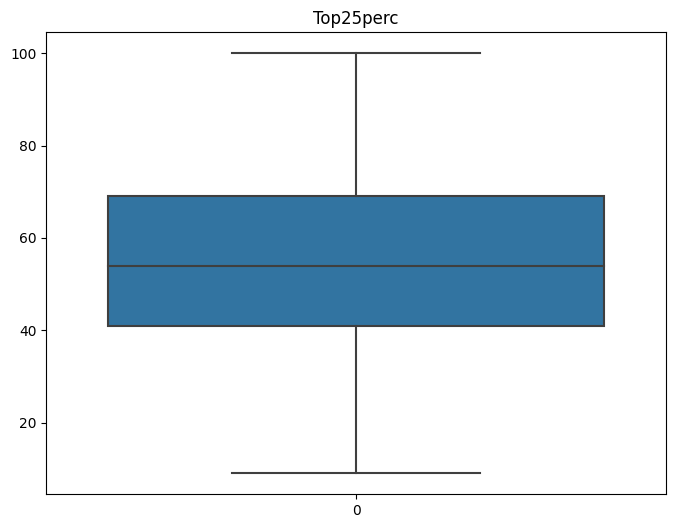

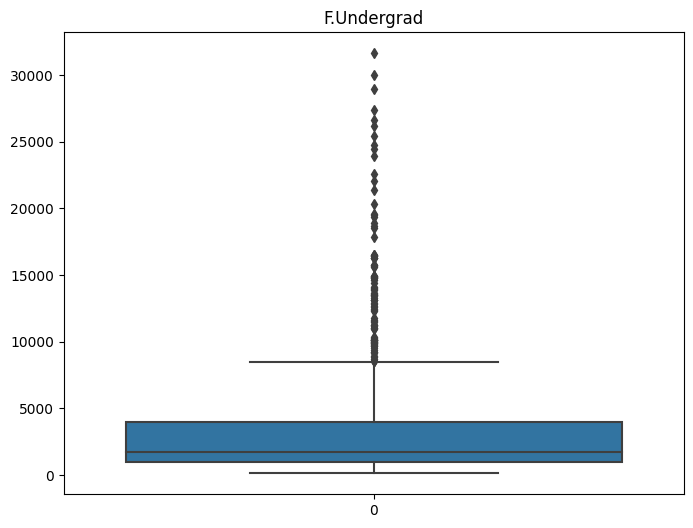

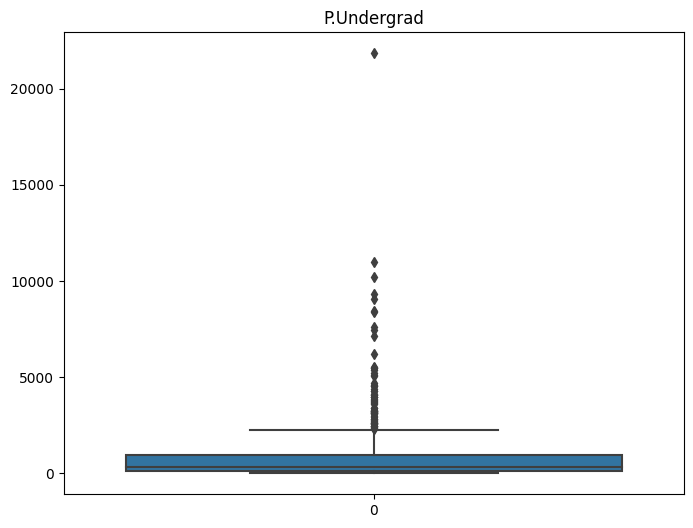

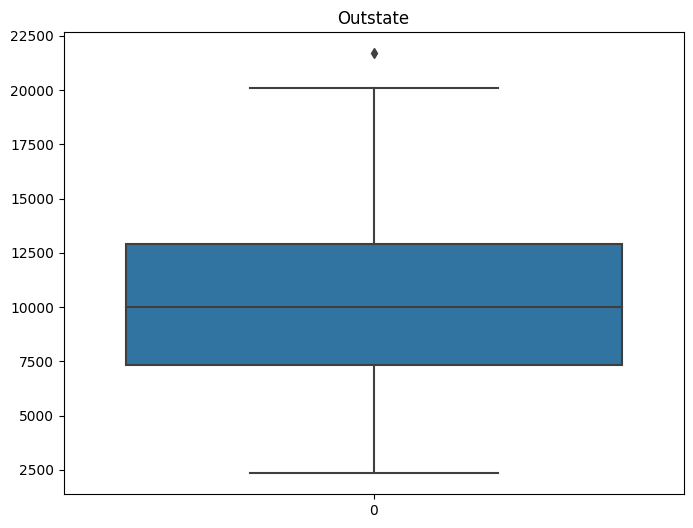

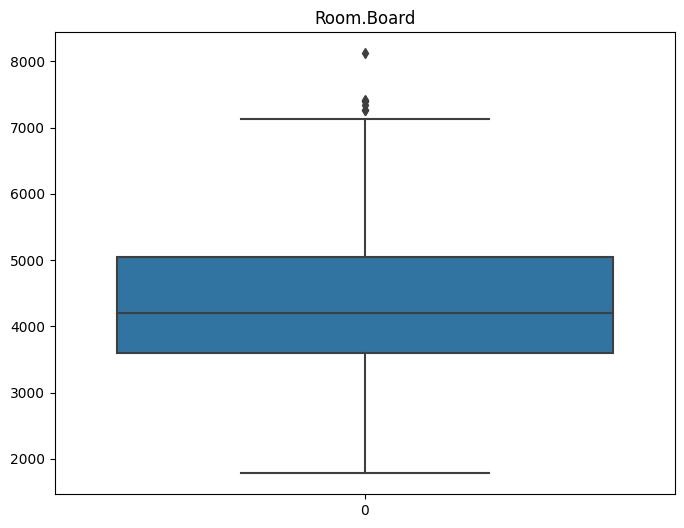

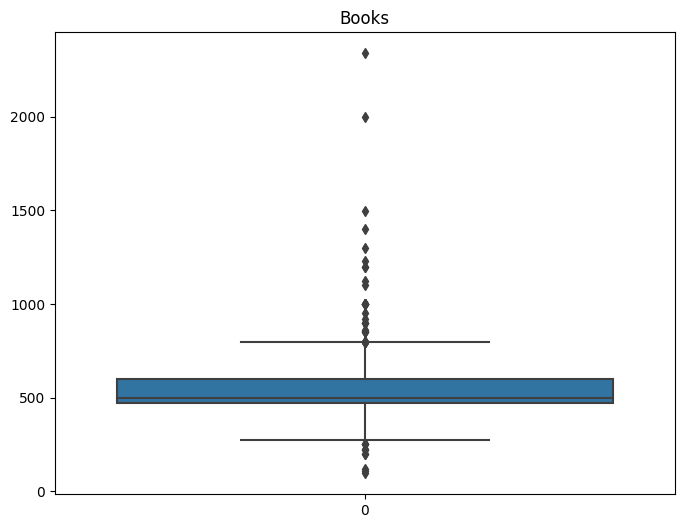

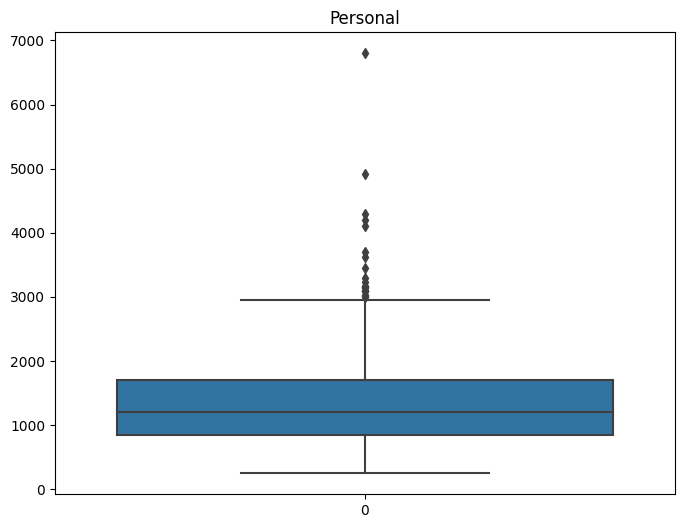

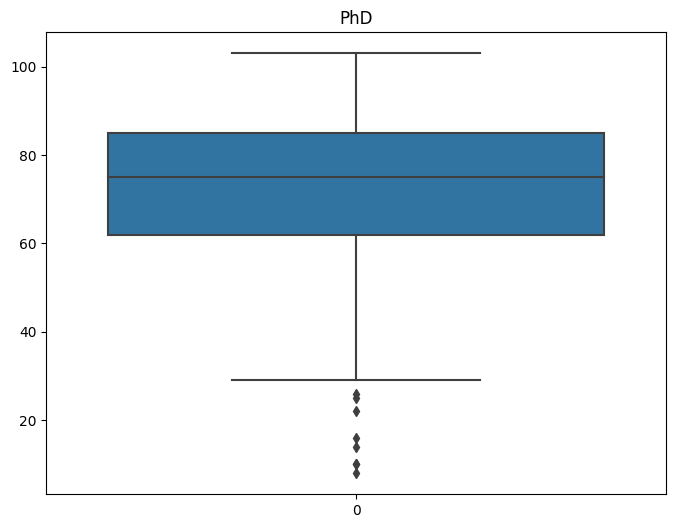

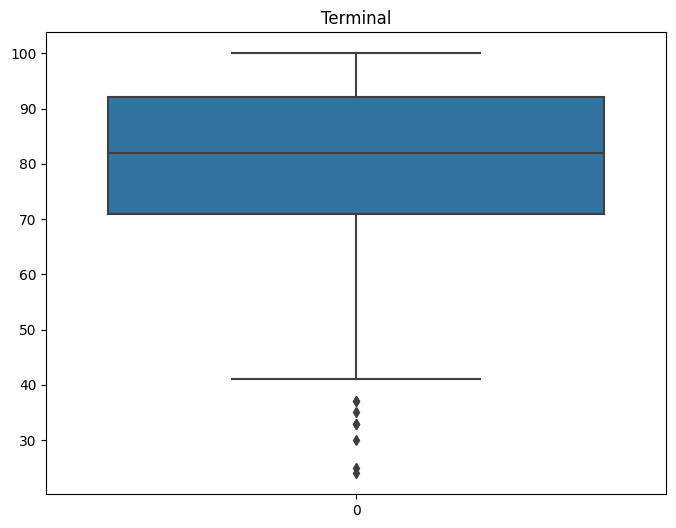

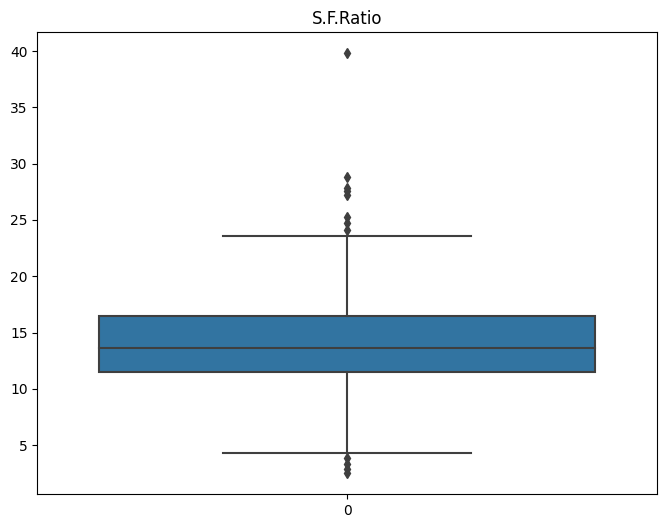

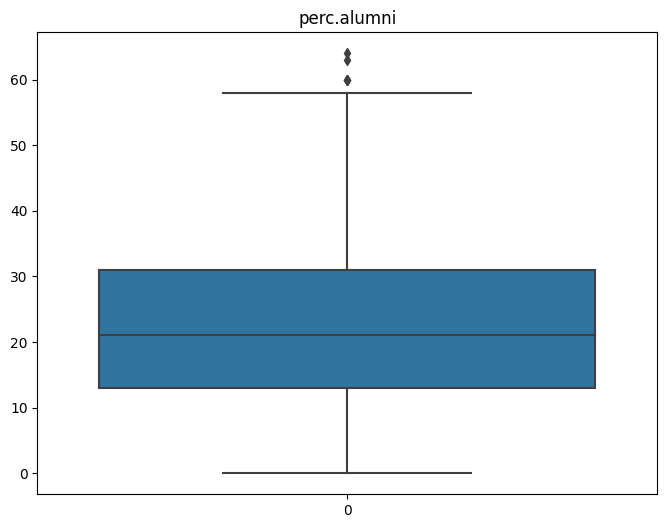

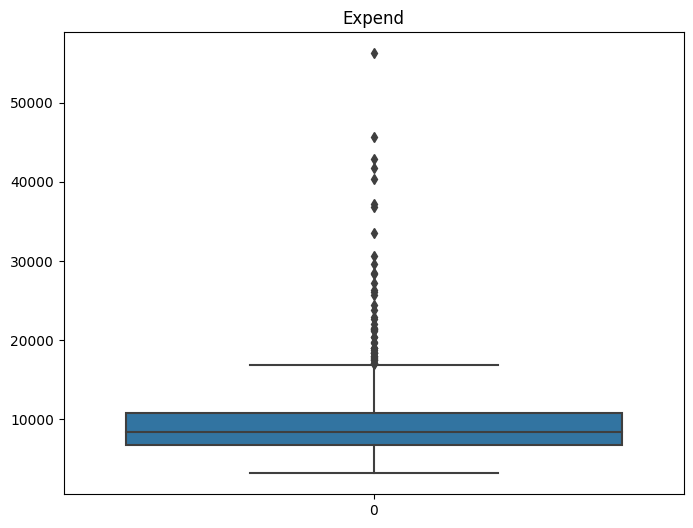

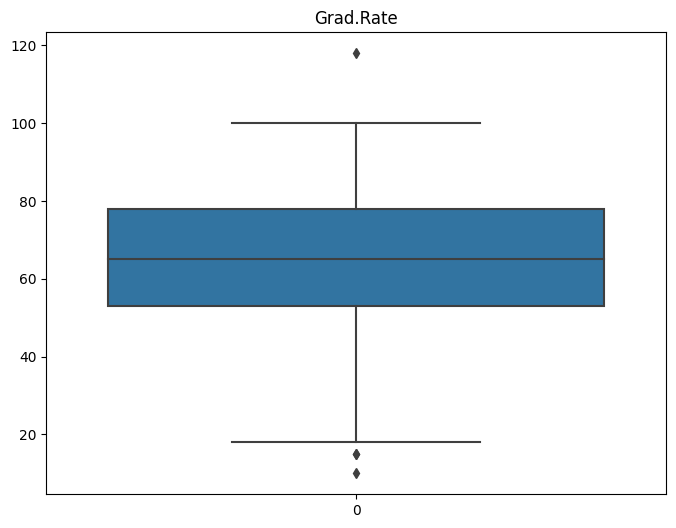

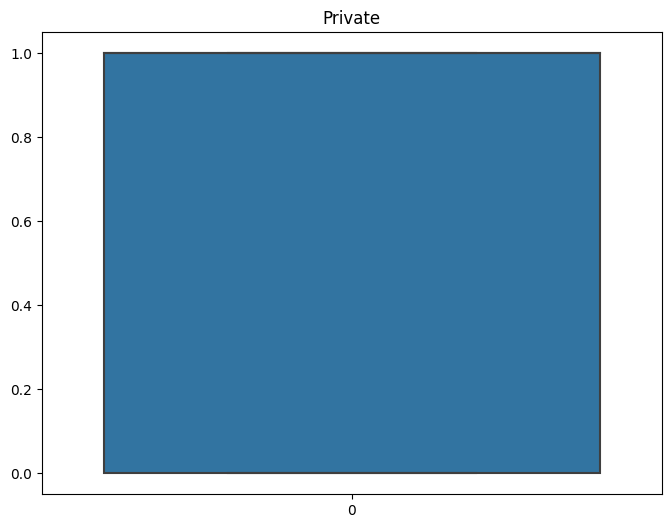

In [504]:
for i in range(0, 18 ):
  plt.figure(figsize=(8, 6))  # Set the figure size (optional)
  sns.boxplot( data=df[df.columns[i]])
  plt.title(df.columns[i])
  plt.show()

vamos remover os outliers e checar os outliers e correlação com o dataframe limpo.

Apps
Accept
Enroll
Top10perc
Top25perc
F.Undergrad
P.Undergrad
Outstate
Room.Board
Books
Personal
PhD
Terminal
S.F.Ratio
perc.alumni
Expend
Grad.Rate


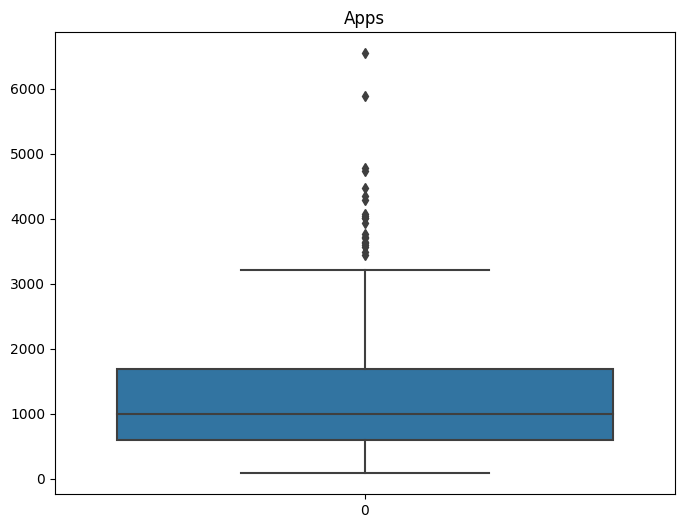

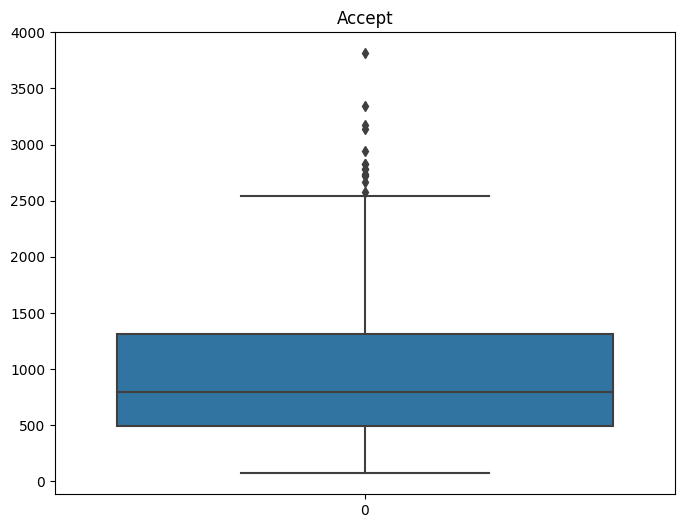

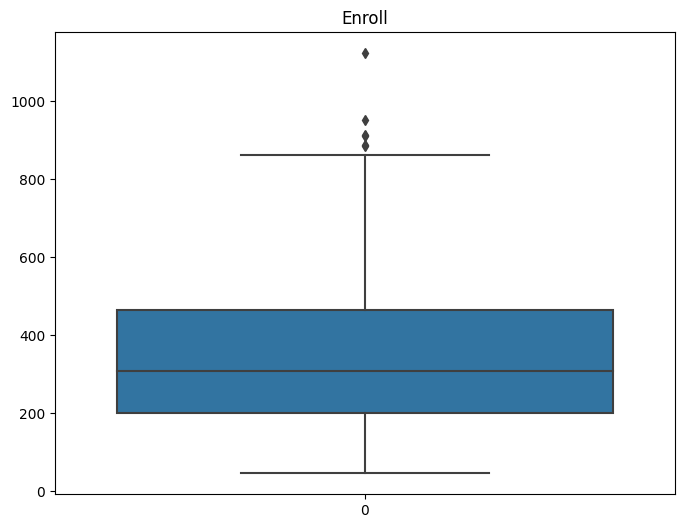

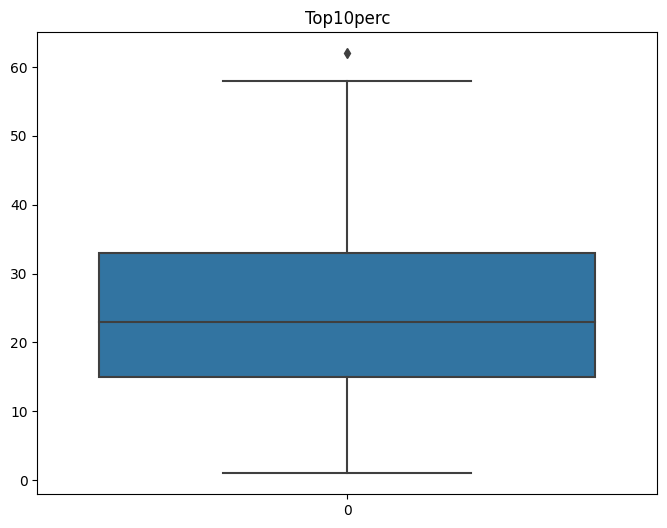

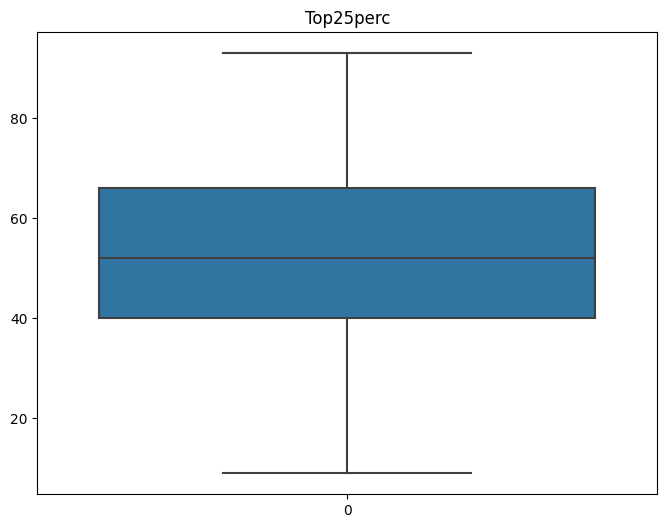

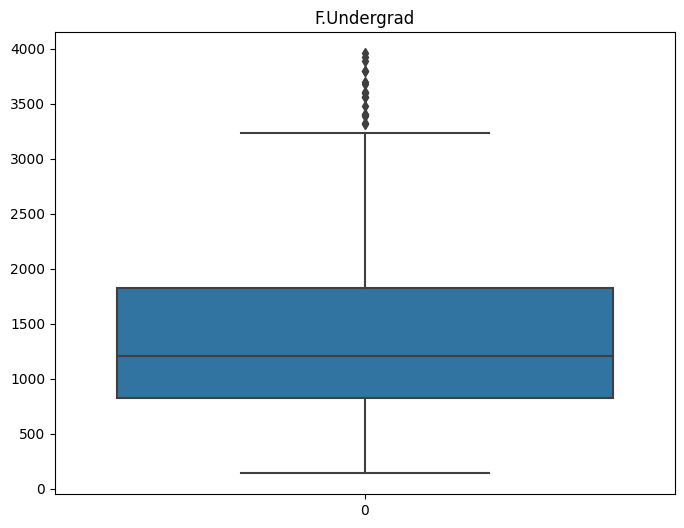

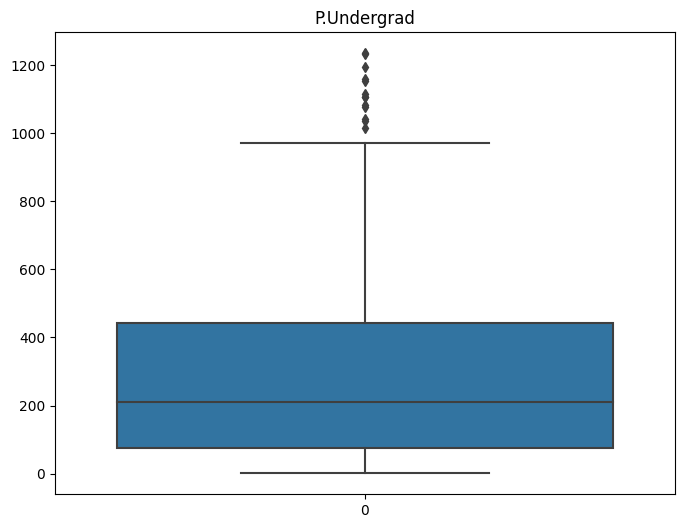

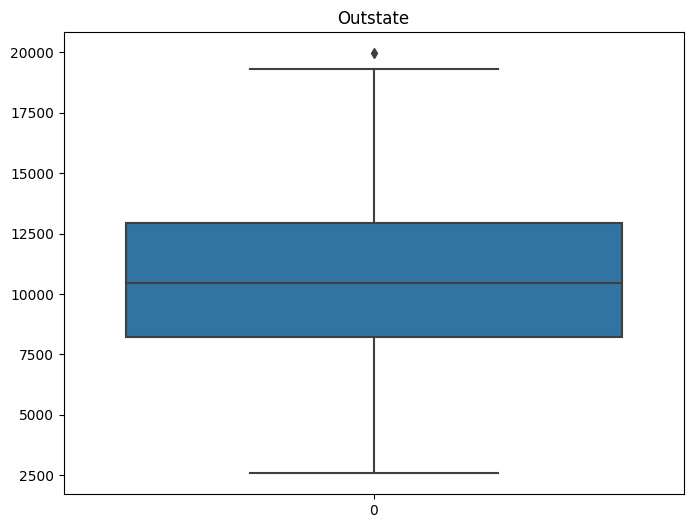

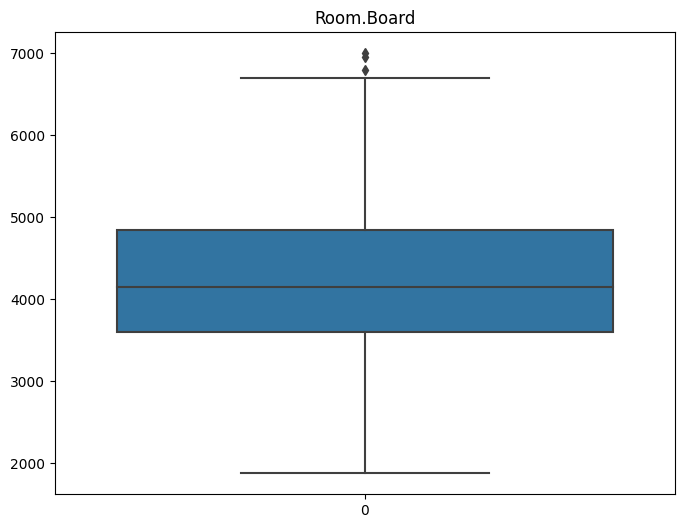

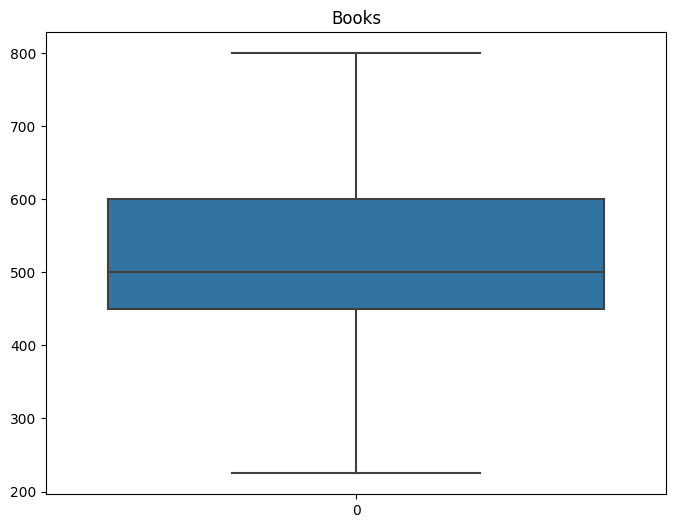

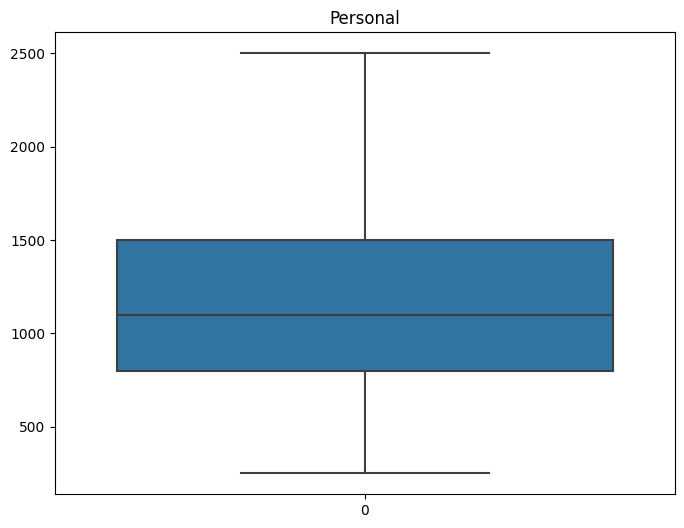

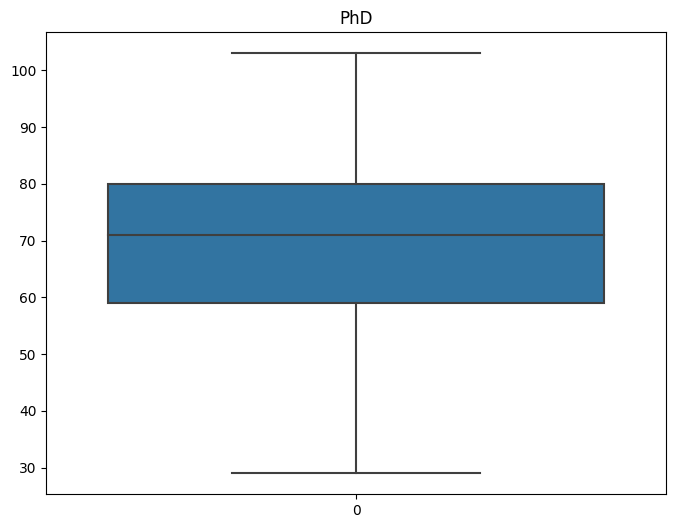

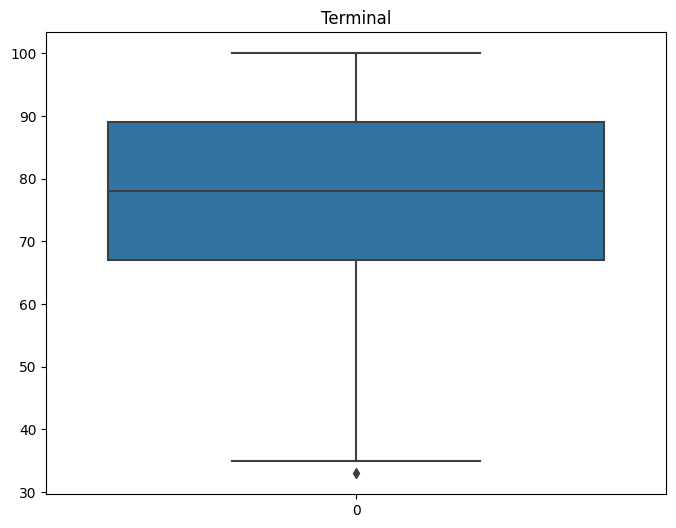

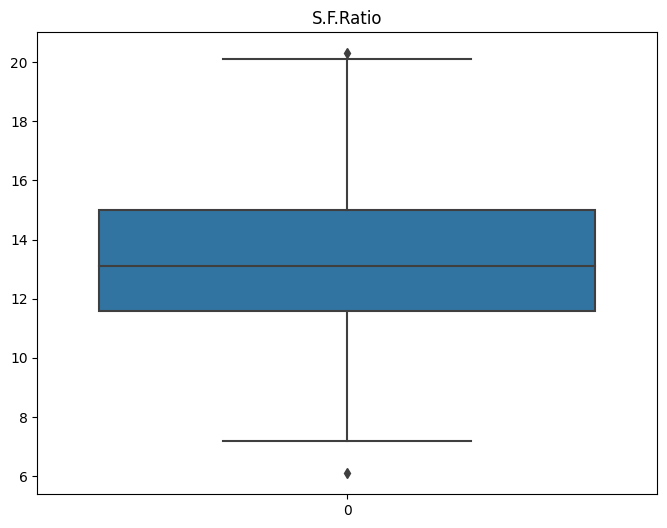

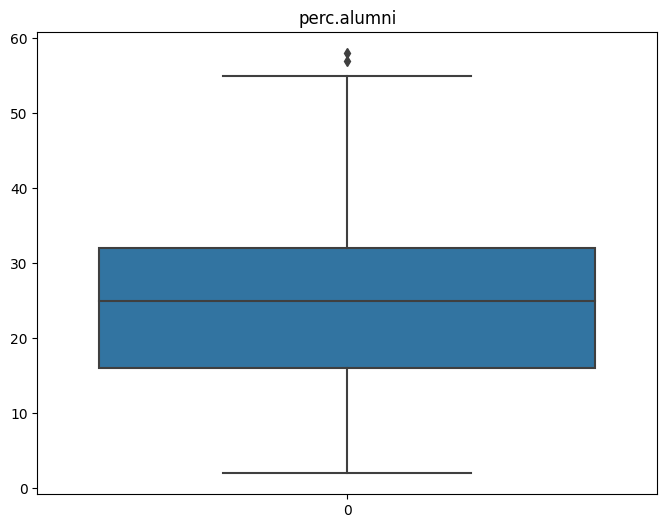

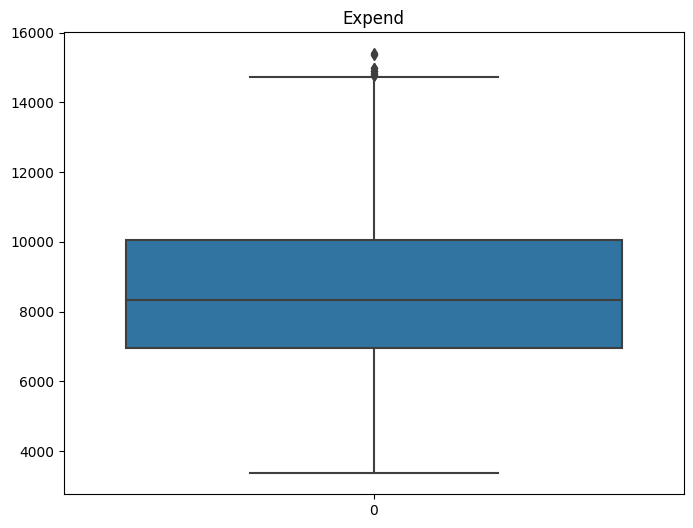

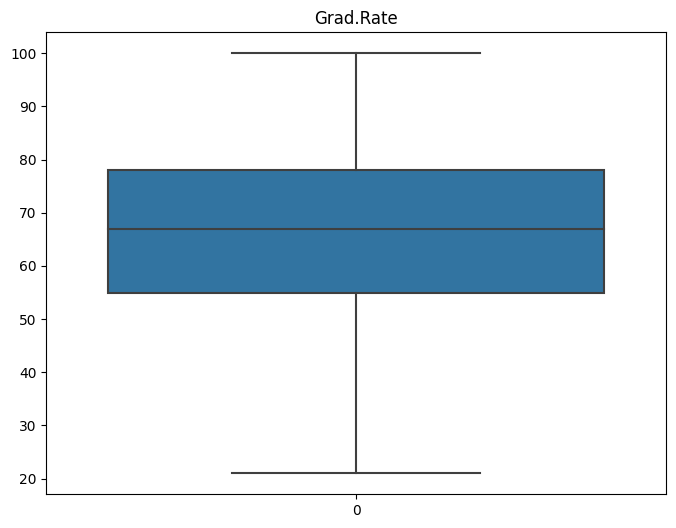

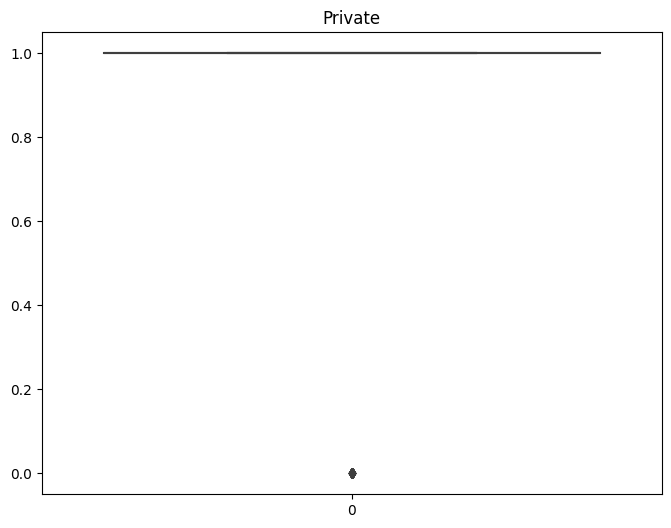

In [505]:
def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_cleaned

cdf = df
for column in cdf:
  if column !="Private":
    print(column)
    cdf = remove_outliers_iqr(cdf,column)

for i in range(0, 18 ):
  plt.figure(figsize=(8, 6))  # Set the figure size (optional)
  sns.boxplot( data=cdf[cdf.columns[i]])
  plt.title(cdf.columns[i])
  plt.show()

In [506]:
cdf.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private
count,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,1287.422472,967.157303,353.343820,24.874157,53.078652,1417.552809,297.912360,10613.332584,4266.921348,515.422472,1163.930337,69.784270,76.874157,13.432809,24.624719,8711.303371,66.065169,0.892135
std,961.633921,645.092296,196.882484,12.607462,17.482053,804.525782,281.004952,3463.667351,964.470076,97.902330,486.511573,14.973196,14.107930,2.516048,11.296807,2501.412008,15.856416,0.310559
min,81.000000,72.000000,46.000000,1.000000,9.000000,139.000000,1.000000,2580.000000,1880.000000,225.000000,250.000000,29.000000,33.000000,6.100000,2.000000,3365.000000,21.000000,0.000000
25%,600.000000,494.000000,200.000000,15.000000,40.000000,822.000000,74.000000,8236.000000,3600.000000,450.000000,800.000000,59.000000,67.000000,11.600000,16.000000,6955.000000,55.000000,1.000000
50%,996.000000,798.000000,307.000000,23.000000,52.000000,1202.000000,209.000000,10475.000000,4150.000000,500.000000,1100.000000,71.000000,78.000000,13.100000,25.000000,8324.000000,67.000000,1.000000
75%,1681.000000,1313.000000,465.000000,33.000000,66.000000,1819.000000,442.000000,12925.000000,4840.000000,600.000000,1500.000000,80.000000,89.000000,15.000000,32.000000,10062.000000,78.000000,1.000000
max,6548.000000,3813.000000,1123.000000,62.000000,93.000000,3957.000000,1235.000000,19964.000000,7000.000000,800.000000,2500.000000,103.000000,100.000000,20.300000,58.000000,15411.000000,100.000000,1.000000


In [507]:
zeroes = cdf[cdf["Private"] == 0]
zeroes.describe()

res=[]
res.append(cdf)
for i in range(3):
  res.append(zeroes)

cdf = pd.concat(res)
cdf.describe()


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,1340.025467,1007.249576,389.524618,23.081494,50.772496,1609.672326,328.748727,9498.707980,4063.022071,516.480475,1215.181664,69.490662,76.069610,14.131239,22.317487,8104.103565,62.947368,0.674024
std,968.244889,651.343938,214.922660,13.253038,18.634760,919.346139,280.781607,3717.185953,1001.403828,97.905367,510.763104,14.994738,14.137333,2.731881,11.291713,2546.029602,16.301860,0.469137
min,81.000000,72.000000,46.000000,1.000000,9.000000,139.000000,1.000000,2580.000000,1880.000000,225.000000,250.000000,29.000000,33.000000,6.100000,2.000000,3365.000000,21.000000,0.000000
25%,610.000000,503.000000,223.000000,13.000000,36.000000,950.000000,95.000000,6600.000000,3392.000000,450.000000,800.000000,59.000000,67.000000,12.100000,13.000000,6374.000000,51.000000,0.000000
50%,1082.000000,850.000000,342.000000,20.000000,50.000000,1337.000000,258.000000,9100.000000,3970.000000,500.000000,1150.000000,71.000000,77.000000,14.000000,22.000000,7735.000000,63.000000,1.000000
75%,1742.000000,1360.000000,510.000000,32.000000,65.000000,2091.000000,486.000000,12040.000000,4690.000000,600.000000,1516.000000,79.000000,88.000000,15.900000,31.000000,9511.000000,75.000000,1.000000
max,6548.000000,3813.000000,1123.000000,62.000000,93.000000,3957.000000,1235.000000,19964.000000,7000.000000,800.000000,2500.000000,103.000000,100.000000,20.300000,58.000000,15411.000000,100.000000,1.000000


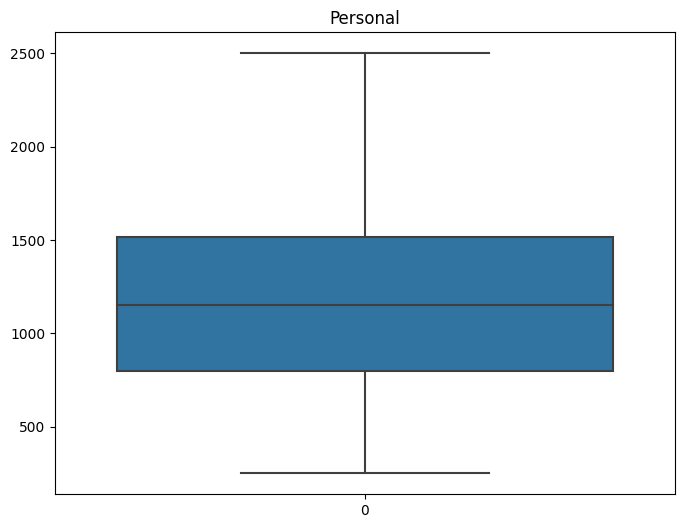

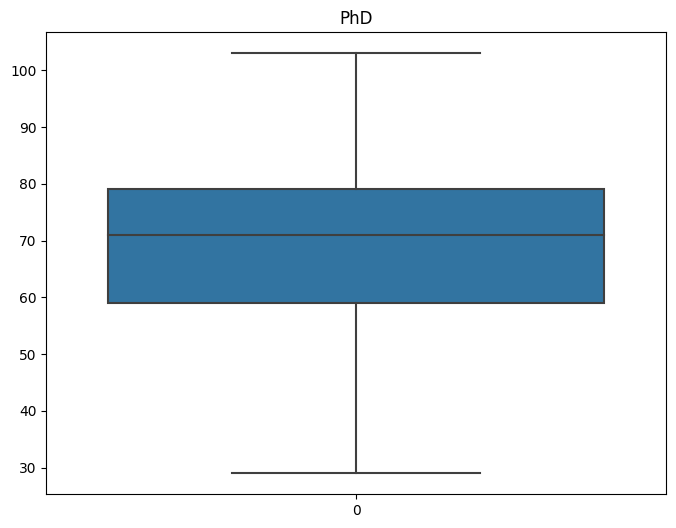

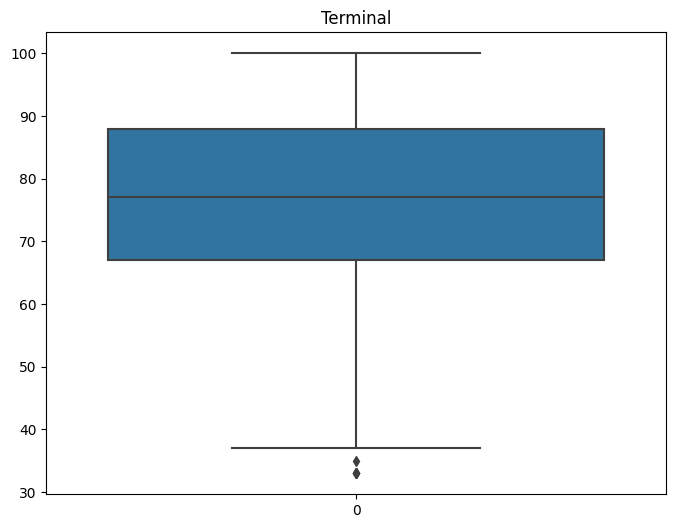

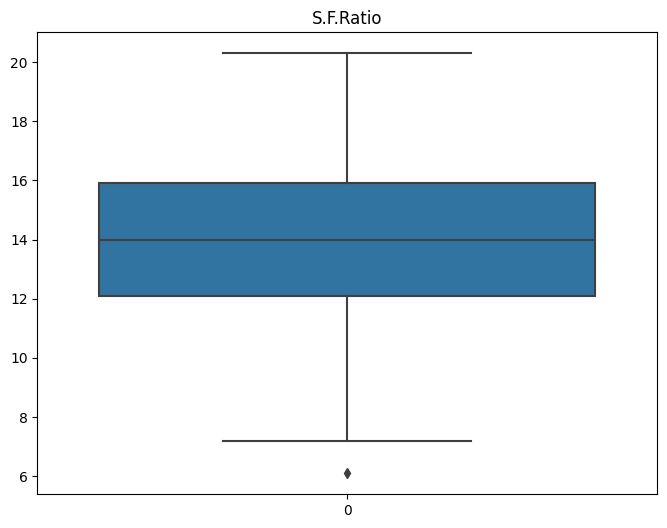

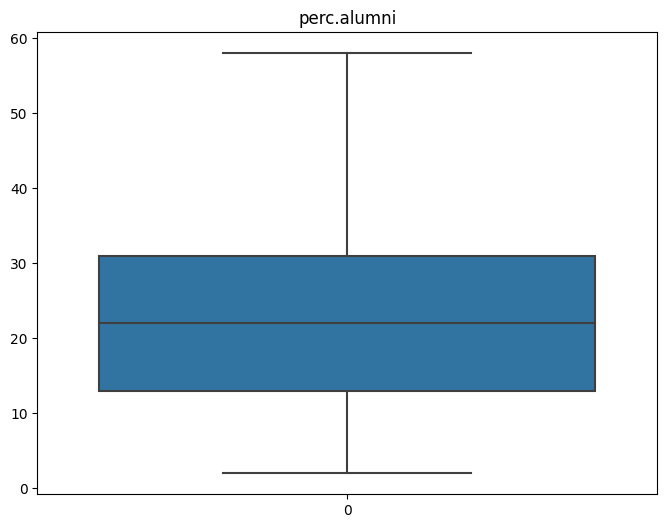

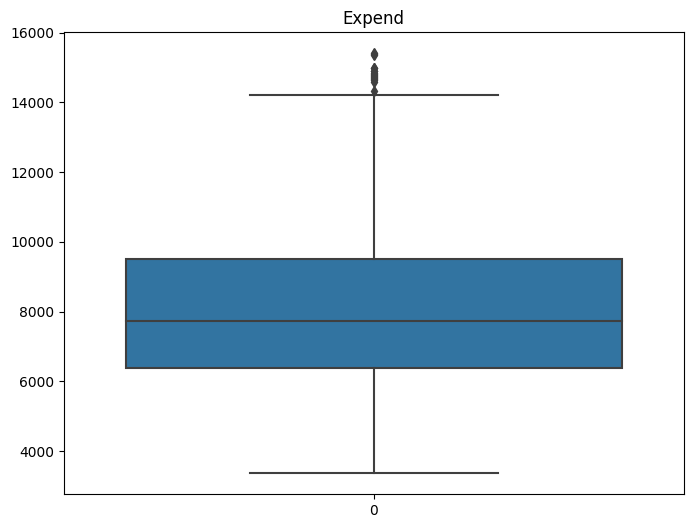

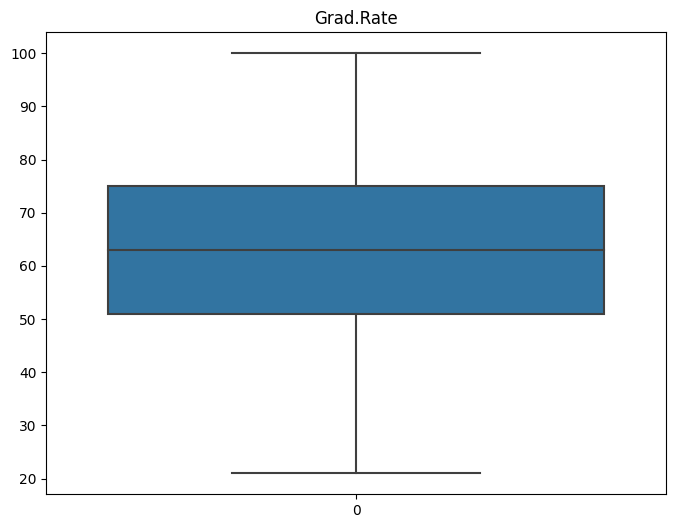

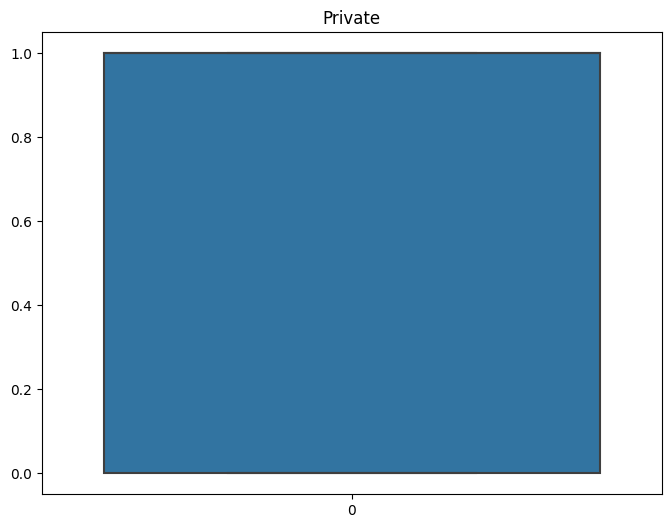

In [508]:
for i in range(10, 18 ):
  plt.figure(figsize=(8, 6))  # Set the figure size (optional)
  sns.boxplot( data=cdf[cdf.columns[i]])
  plt.title(cdf.columns[i])
  plt.show()

In [509]:

cdf = cdf.sample(frac=1, random_state=42)
tests, cdf = cdf.iloc[500:589] , cdf.iloc[0:500]
cdf.describe()


,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1349.170000,1011.490000,391.362000,23.194000,51.008000,1618.918000,330.660000,9482.096000,4074.882000,517.768000,1215.224000,69.370000,75.886000,14.170200,22.166000,8083.146000,63.200000,0.674000
std,964.279122,645.176875,214.924004,13.366889,18.841708,925.003454,284.134886,3731.972324,1014.304198,98.675264,506.403474,14.903736,14.208052,2.725294,11.282599,2574.748139,16.237219,0.469217
min,81.000000,72.000000,46.000000,1.000000,9.000000,139.000000,1.000000,2580.000000,1880.000000,225.000000,250.000000,29.000000,33.000000,6.100000,2.000000,3365.000000,21.000000,0.000000
25%,661.250000,520.000000,224.000000,13.000000,36.000000,958.750000,95.000000,6600.000000,3392.000000,450.000000,800.000000,58.750000,67.000000,12.200000,13.000000,6369.750000,51.000000,0.000000
50%,1101.500000,858.500000,344.500000,20.000000,50.000000,1320.500000,240.500000,9057.000000,3972.500000,500.000000,1150.000000,71.000000,77.000000,14.050000,22.000000,7667.500000,63.000000,1.000000
75%,1742.250000,1373.000000,510.250000,32.250000,66.000000,2138.000000,488.500000,12053.750000,4692.500000,600.000000,1500.000000,79.000000,88.000000,15.925000,30.000000,9496.750000,76.000000,1.000000
max,6548.000000,3813.000000,1123.000000,62.000000,93.000000,3957.000000,1235.000000,19964.000000,7000.000000,800.000000,2500.000000,103.000000,100.000000,20.300000,58.000000,15411.000000,100.000000,1.000000


In [510]:
tests.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,1288.651685,983.426966,379.202247,22.449438,49.449438,1557.730337,318.011236,9592.033708,3996.393258,509.247191,1214.943820,70.168539,77.101124,13.912360,23.168539,8221.842697,61.528090,0.674157
std,994.215864,688.282792,215.838912,12.648222,17.468160,890.180660,262.402687,3652.332612,928.151482,93.668817,537.576852,15.565285,13.765937,2.773938,11.369053,2388.620760,16.682251,0.471344
min,150.000000,130.000000,85.000000,3.000000,12.000000,309.000000,1.000000,2700.000000,2439.000000,225.000000,300.000000,39.000000,41.000000,8.300000,4.000000,4222.000000,22.000000,0.000000
25%,535.000000,481.000000,214.000000,13.000000,37.000000,945.000000,99.000000,6400.000000,3340.000000,450.000000,790.000000,59.000000,68.000000,12.000000,15.000000,6436.000000,50.000000,0.000000
50%,979.000000,798.000000,336.000000,20.000000,47.000000,1350.000000,283.000000,9520.000000,3788.000000,500.000000,1130.000000,73.000000,79.000000,13.500000,21.000000,7994.000000,62.000000,1.000000
75%,1660.000000,1261.000000,484.000000,30.000000,61.000000,1983.000000,436.000000,11844.000000,4660.000000,600.000000,1600.000000,80.000000,88.000000,15.900000,31.000000,9583.000000,71.000000,1.000000
max,4784.000000,3346.000000,1123.000000,56.000000,87.000000,3793.000000,1078.000000,19240.000000,6430.000000,750.000000,2500.000000,103.000000,99.000000,20.300000,53.000000,15387.000000,100.000000,1.000000


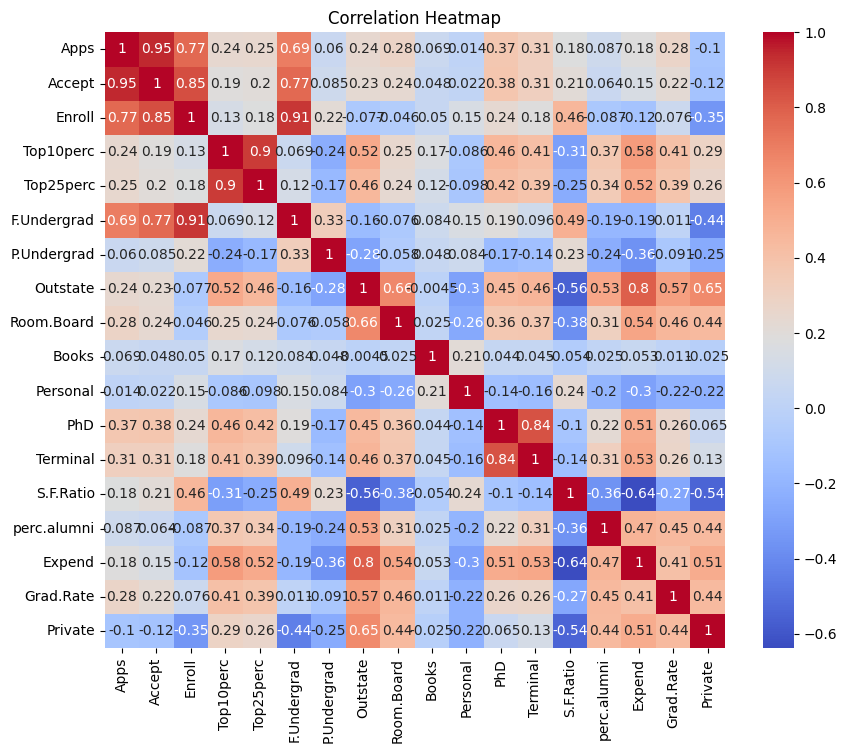

In [511]:
correlation_matrix = cdf.corr()
plt.figure(figsize=(10, 8))  # Set the figure size (optional)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

vemos que a correlação entre atributos aumento no geral.

# cálculo K-medias e K-medoids

In [512]:
df = cdf
df.shape

(500, 18)

In [513]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df[df.columns])
df_scale = pd.DataFrame(scale, columns = df.columns);
df_scale.head(5)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private
0,0.194681,0.166533,0.221913,0.672131,0.761905,0.308015,0.168558,0.242752,0.556641,0.782609,0.444444,0.743243,0.835821,0.387324,0.375000,0.580442,0.531646,0.0
1,0.133447,0.187650,0.365831,0.213115,0.297619,0.533002,0.427877,0.217441,0.171875,0.565217,0.554667,0.648649,0.656716,0.626761,0.053571,0.255521,0.341772,0.0
2,0.061698,0.089014,0.310121,0.295082,0.440476,0.401781,0.820908,0.103889,0.065820,0.652174,0.555556,0.270270,0.313433,0.683099,0.107143,0.194172,0.531646,0.0
3,0.059224,0.092756,0.127205,0.147541,0.261905,0.143269,0.231767,0.383111,0.390625,0.434783,0.373333,0.000000,0.238806,0.077465,0.267857,0.503570,0.329114,1.0
4,0.298747,0.262229,0.154132,0.524590,0.619048,0.202462,0.127229,0.147837,0.225781,0.478261,0.624444,0.472973,0.611940,0.309859,0.160714,0.347169,0.481013,1.0


In [514]:
EM = []
CH = []
CH.append(None)
DB = []
DB.append(None)
SI = []
SI.append(None)
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++').fit(df_scale)
    EM.append(kmeans.inertia_)

    labels = kmeans.labels_
    labels = kmeans.labels_
    if cluster >1:
      CH.append(metrics.calinski_harabasz_score(df_scale, labels))
      DB.append(metrics.davies_bouldin_score(df_scale, labels))
      SI.append(metrics.silhouette_score(df_scale, labels))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

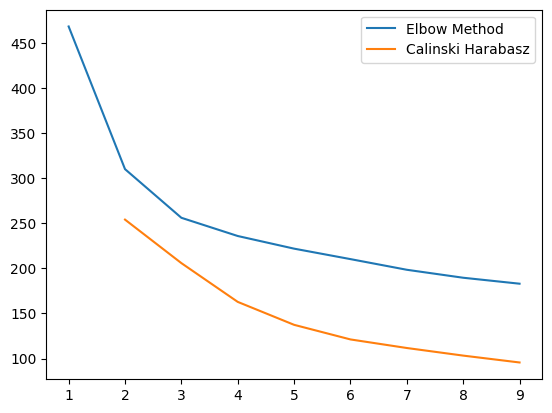

In [515]:
# converting the results into a dataframe and plotting them
X = range(1,10)
plt.plot(X, EM, label = 'Elbow Method')
plt.plot(X, CH, label = 'Calinski Harabasz')
plt.legend()
plt.show()

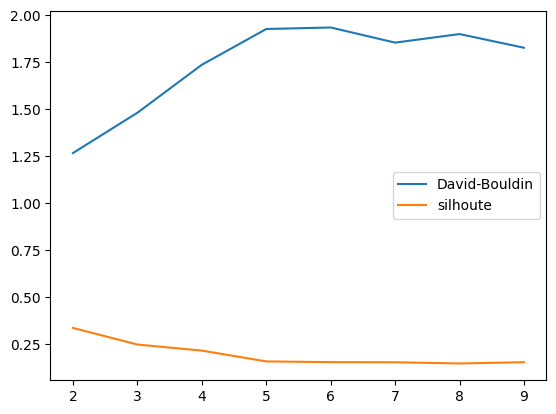

In [516]:
X = range(1,10)
plt.plot(X, DB, label = 'David-Bouldin')
plt.plot(X, SI, label = 'silhoute')
plt.legend()
plt.show()

In [517]:
num_clusters = 2

km=KMeans(n_clusters= num_clusters)
y_predicted = km.fit_predict(df_scale[df.columns])
y_predicted.size
df_scale["Clusters"] = y_predicted

kmeans_model = KMeans(n_clusters=3, random_state=1).fit(df_scale)
labels = kmeans_model.labels_
metrics.calinski_harabasz_score(df_scale, labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


312.4374024487499

In [518]:
df_scale.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Private,Clusters
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.196099,0.251133,0.320670,0.363836,0.500095,0.387616,0.267147,0.397037,0.428688,0.509162,0.428988,0.545541,0.640090,0.568324,0.360107,0.391677,0.534177,0.674000,0.674000
std,0.149108,0.172461,0.199558,0.219129,0.224306,0.242274,0.230255,0.214679,0.198106,0.171609,0.225068,0.201402,0.212060,0.191922,0.201475,0.213743,0.205534,0.469217,0.469217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.089725,0.119754,0.165274,0.196721,0.321429,0.214707,0.076175,0.231247,0.295313,0.391304,0.244444,0.402027,0.507463,0.429577,0.196429,0.249440,0.379747,0.000000,0.000000
50%,0.157801,0.210238,0.277159,0.311475,0.488095,0.309455,0.194084,0.372584,0.408691,0.478261,0.400000,0.567568,0.656716,0.559859,0.357143,0.357173,0.531646,1.000000,1.000000
75%,0.256881,0.347768,0.431058,0.512295,0.678571,0.523573,0.395057,0.544970,0.549316,0.652174,0.555556,0.675676,0.820896,0.691901,0.500000,0.509028,0.696203,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [519]:
EM = []
CH = []
CH.append(None)
DB = []
DB.append(None)
SI = []
SI.append(None)
for cluster in range(1,10):
    kmeans = KMedoids(n_clusters = cluster, init='k-medoids++').fit(df_scale)
    EM.append(kmeans.inertia_)

    labels = kmeans.labels_
    if cluster >1:
      CH.append(metrics.calinski_harabasz_score(df_scale, labels))
      DB.append(metrics.davies_bouldin_score(df_scale, labels))
      SI.append(metrics.silhouette_score(df_scale, labels))

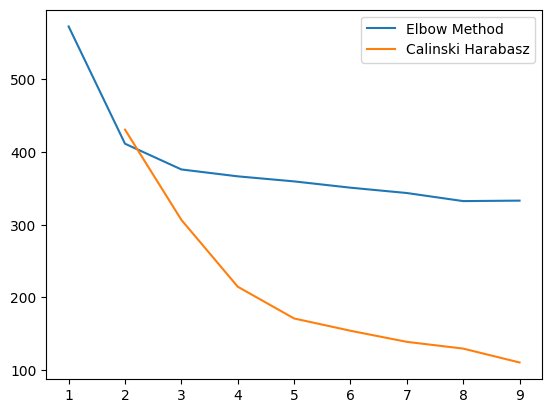

In [520]:
# converting the results into a dataframe and plotting them
X = range(1,10)
plt.plot(X, EM, label = 'Elbow Method')
plt.plot(X, CH, label = 'Calinski Harabasz')
plt.legend()
plt.show()

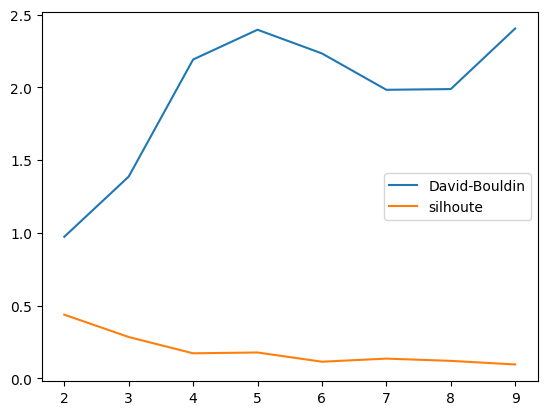

In [521]:
X = range(1,10)
plt.plot(X, DB, label = 'David-Bouldin')
plt.plot(X, SI, label = 'silhoute')
plt.legend()
plt.show()

In [522]:
num_clusters = 2

kmd=KMedoids(n_clusters= num_clusters)
y_predicted = kmd.fit_predict(df_scale[df.columns])
y_predicted.size
df_scale["Clusters_medoids"] = y_predicted


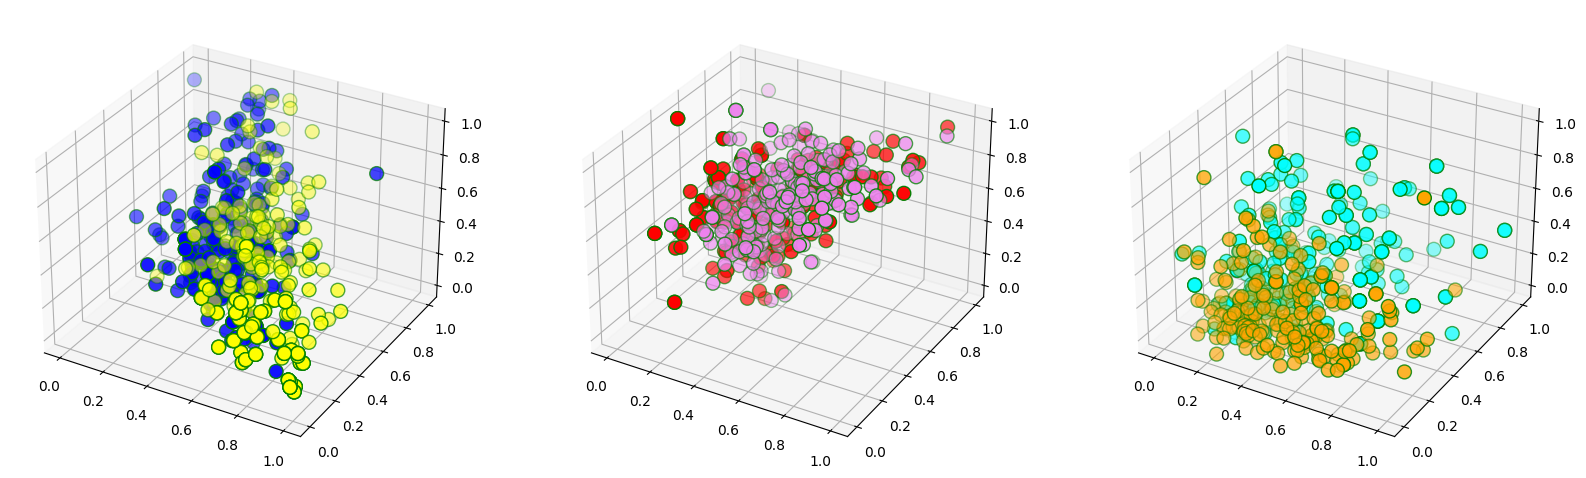

In [523]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,3,1, projection='3d')
ax.scatter(df_scale["S.F.Ratio"][df_scale.Clusters_medoids == 0], df_scale["Outstate"][df_scale.Clusters_medoids == 0], df_scale["Expend"][df_scale.Clusters_medoids == 0], c='yellow', s=100, edgecolor='green',linestyle='-')
ax.scatter(df_scale["S.F.Ratio"][df_scale.Clusters_medoids == 1], df_scale["Outstate"][df_scale.Clusters_medoids == 1], df_scale["Expend"][df_scale.Clusters_medoids == 1], c='blue', s=100, edgecolor='green',linestyle='-')

ax = fig.add_subplot(1,3,2, projection='3d')
ax.scatter(df_scale["Outstate"][df_scale.Clusters_medoids == 0], df_scale["Books"][df_scale.Clusters_medoids == 0], df_scale["Terminal"][df_scale.Clusters_medoids == 0], c='red', s=100, edgecolor='green',linestyle='-')
ax.scatter(df_scale["Outstate"][df_scale.Clusters_medoids == 1], df_scale["Books"][df_scale.Clusters_medoids == 1], df_scale["Terminal"][df_scale.Clusters_medoids == 1], c='violet', s=100, edgecolor='green',linestyle='-')

ax = fig.add_subplot(1,3,3, projection='3d')
ax.scatter(df_scale["Personal"][df_scale.Clusters_medoids == 0], df_scale["F.Undergrad"][df_scale.Clusters_medoids == 0], df_scale["P.Undergrad"][df_scale.Clusters_medoids == 0], c='cyan', s=100, edgecolor='green',linestyle='-')
ax.scatter(df_scale["Personal"][df_scale.Clusters_medoids == 1], df_scale["F.Undergrad"][df_scale.Clusters_medoids == 1], df_scale["P.Undergrad"][df_scale.Clusters_medoids == 1], c='orange', s=100, edgecolor='green',linestyle='-')

plt.show()

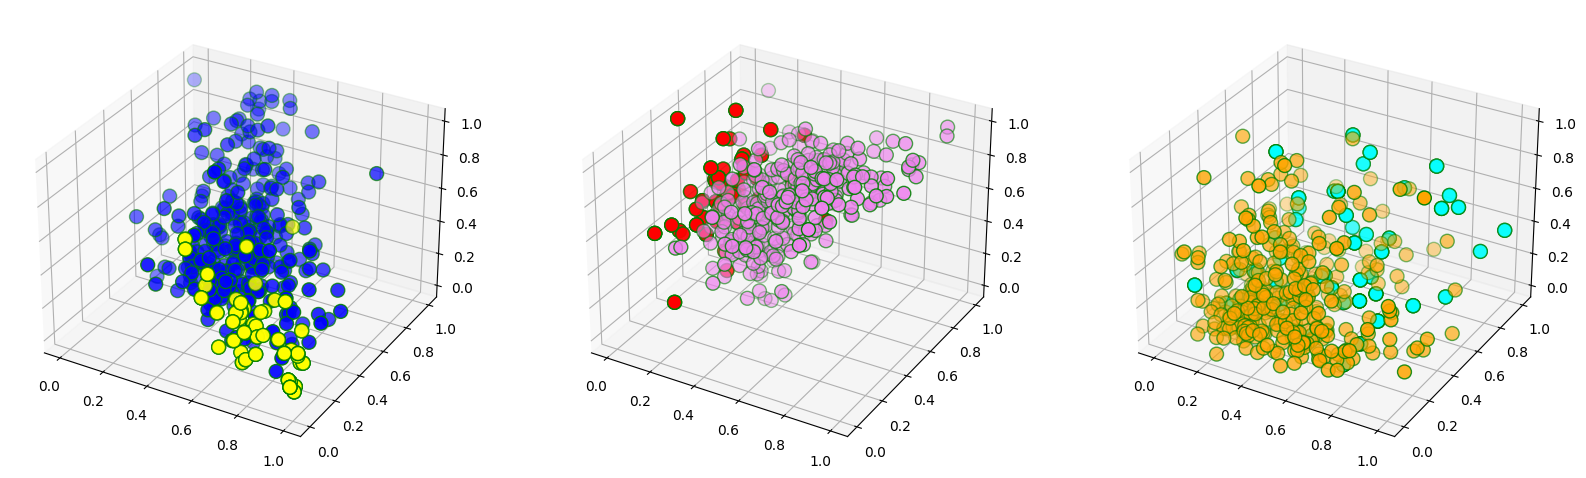

In [524]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,3,1, projection='3d')
ax.scatter(df_scale["S.F.Ratio"][df_scale.Clusters == 0], df_scale["Outstate"][df_scale.Clusters == 0], df_scale["Expend"][df_scale.Clusters == 0], c='yellow', s=100, edgecolor='green',linestyle='-')
ax.scatter(df_scale["S.F.Ratio"][df_scale.Clusters == 1], df_scale["Outstate"][df_scale.Clusters == 1], df_scale["Expend"][df_scale.Clusters == 1], c='blue', s=100, edgecolor='green',linestyle='-')

ax = fig.add_subplot(1,3,2, projection='3d')
ax.scatter(df_scale["Outstate"][df_scale.Clusters == 0], df_scale["Books"][df_scale.Clusters == 0], df_scale["Terminal"][df_scale.Clusters == 0], c='red', s=100, edgecolor='green',linestyle='-')
ax.scatter(df_scale["Outstate"][df_scale.Clusters == 1], df_scale["Books"][df_scale.Clusters == 1], df_scale["Terminal"][df_scale.Clusters == 1], c='violet', s=100, edgecolor='green',linestyle='-')

ax = fig.add_subplot(1,3,3, projection='3d')
ax.scatter(df_scale["Personal"][df_scale.Clusters == 0], df_scale["F.Undergrad"][df_scale.Clusters == 0], df_scale["P.Undergrad"][df_scale.Clusters == 0], c='cyan', s=100, edgecolor='green',linestyle='-')
ax.scatter(df_scale["Personal"][df_scale.Clusters == 1], df_scale["F.Undergrad"][df_scale.Clusters == 1], df_scale["P.Undergrad"][df_scale.Clusters == 1], c='orange', s=100, edgecolor='green',linestyle='-')

plt.show()

# Análise dos clusters

vamos ver como cada variável está distribuida nos clusters.

<ipython-input-525-b6e7f97a3629>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_scale[df_scale.columns[18:]].hist(ax=ax)


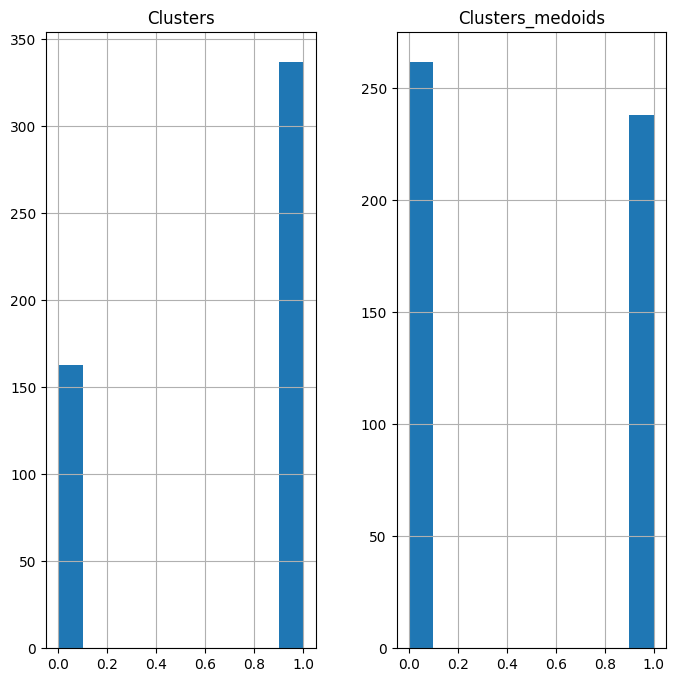

In [525]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
df_scale[df_scale.columns[18:]].hist(ax=ax)
plt.show()


In [526]:
dist = df_scale[(df_scale["Private"] == 0)]
dist = dist[["Private","Clusters", "Clusters_medoids"]]
dist.describe()

,Private,Clusters,Clusters_medoids
count,163.0,163.0,163.000000
mean,0.0,0.0,0.214724
std,0.0,0.0,0.411896
min,0.0,0.0,0.000000
25%,0.0,0.0,0.000000
50%,0.0,0.0,0.000000
75%,0.0,0.0,0.000000
max,0.0,0.0,1.000000


In [527]:
dist = df_scale[(df_scale["Private"] == 1)]
dist = dist[["Private","Clusters", "Clusters_medoids"]]
dist.describe()

,Private,Clusters,Clusters_medoids
count,337.0,337.0,337.000000
mean,1.0,1.0,0.602374
std,0.0,0.0,0.490135
min,1.0,1.0,0.000000
25%,1.0,1.0,0.000000
50%,1.0,1.0,1.000000
75%,1.0,1.0,1.000000
max,1.0,1.0,1.000000


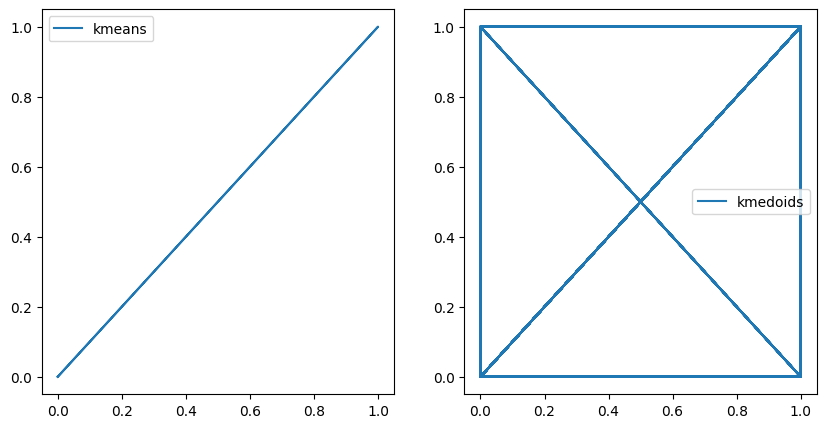

In [528]:
x = df_scale[["Private"]]
y = df_scale[["Clusters"]]
z = df_scale[["Clusters_medoids"]]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax.plot(x,y, label="kmeans")
ax.legend()
ax = fig.add_subplot(1,2,2)
ax.plot(x,z, label="kmedoids")
ax.legend()
plt.show()

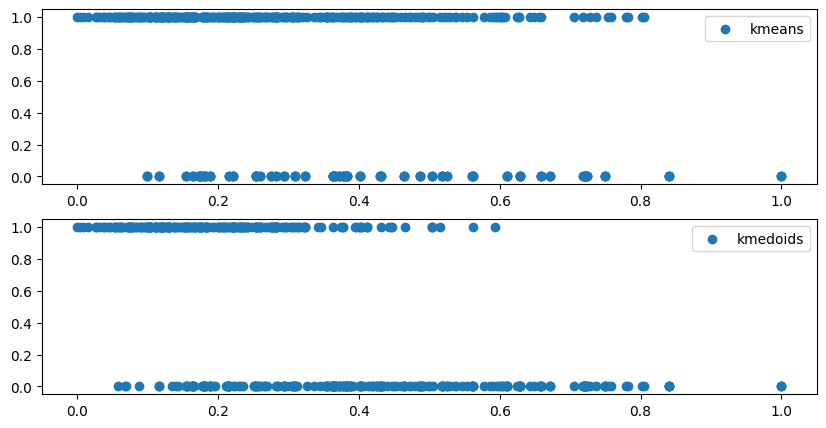

In [529]:
x = df_scale[["Enroll"]]
y = df_scale[["Clusters"]]
z = df_scale[["Clusters_medoids"]]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(2,1,1)
ax.scatter(x,y, label="kmeans")
ax.legend()
ax = fig.add_subplot(2,1,2)
ax.scatter(x,z, label="kmedoids")
ax.legend()
plt.show()

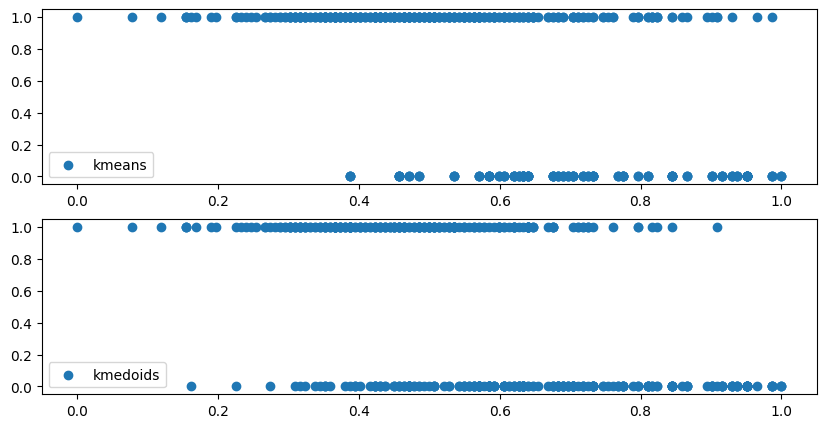

In [530]:
x = df_scale[["S.F.Ratio"]]
y = df_scale[["Clusters"]]
z = df_scale[["Clusters_medoids"]]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(2,1,1)
ax.scatter(x,y, label="kmeans")
ax.legend()
ax = fig.add_subplot(2,1,2)
ax.scatter(x,z, label="kmedoids")
ax.legend()
plt.show()

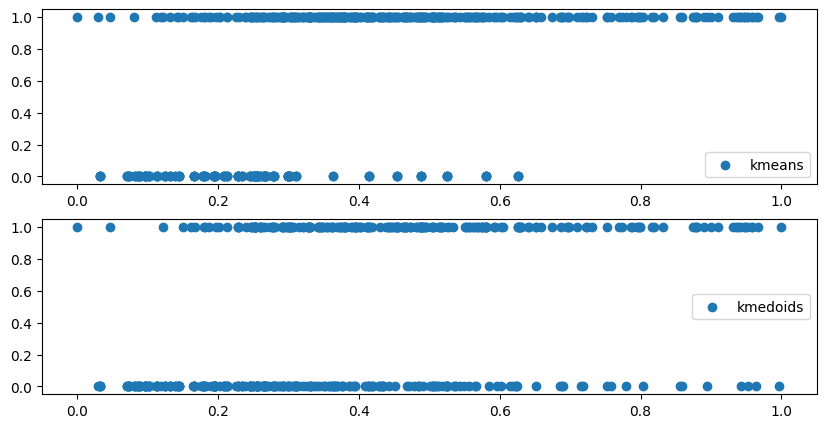

In [531]:
x = df_scale[["Expend"]]
y = df_scale[["Clusters"]]
z = df_scale[["Clusters_medoids"]]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(2,1,1)
ax.scatter(x,y, label="kmeans")
ax.legend()
ax = fig.add_subplot(2,1,2)
ax.scatter(x,z, label="kmedoids")
ax.legend()
plt.show()

In [532]:
labels = km.predict(tests)
labels_medoid = kmd.predict(tests)